<a href="https://colab.research.google.com/github/anitangeri/HTML-TASK/blob/master/Sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data from Excel file
data = pd.read_excel('/content/sales.xlsx')

data.head(5)


,Fiscal year/period,Month,Year,Demand Area,Material Group,Sub Demand Area,Volume(Cases),Sales (₦),Temperature,GDP Growth,GDP_Per_Capita ($),Inflation_Rate,CPI
0,1.2019,January,2019,Lagos Central,FG_BEVERAGES_NCD,AJAH,2.628309,6870797.46,28.6°C,0.0227,2334,0.114,276.6
1,1.2019,January,2019,Lagos Central,FG_BEVERAGES_NCD,APAPA,1.583956,7594704.43,28.6°C,0.0227,2334,0.114,276.6
2,1.2019,January,2019,Lagos Central,FG_BEVERAGES_NCD,BARIGA,1.417127,5241368.14,28.6°C,0.0227,2334,0.114,276.6
3,1.2019,January,2019,Lagos Central,FG_BEVERAGES_NCD,IKEJA,1.548528,11822807.42,28.6°C,0.0227,2334,0.114,276.6
4,1.2019,January,2019,Lagos Central,FG_BEVERAGES_NCD,MARINA,2.261003,10013578.19,28.6°C,0.0227,2334,0.114,276.6


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2789 entries, 0 to 3894
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               2789 non-null   int64  
 1   Year                2789 non-null   int64  
 2   Sales  (₦)          2789 non-null   float64
 3   GDP Growth          2789 non-null   float64
 4   GDP_Per_Capita ($)  2789 non-null   int64  
 5   Inflation_Rate      2789 non-null   float64
 6   CPI                 2789 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 174.3 KB


In [67]:
# Define a dictionary to map month names to numerical values
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
# Drop rows where 'Month' column has NaN values
data = data.dropna(subset=['Month'])

# Convert 'Month' column to numerical values using the month_to_number dictionary
data['Month'] = data['Month'].apply(lambda x: month_to_number.get(x, 0))


# Define columns to drop
columns_to_drop = ['Fiscal year/period', 'Demand Area', 'Material Group', 'Sub Demand Area', 'Volume(Cases)', 'Temperature']
data = data.drop(columns=columns_to_drop)

# Convert 'CPI' column to numeric, handling errors and coercing invalid parsing to NaN
data['CPI'] = pd.to_numeric(data['CPI'], errors='coerce')

# Drop rows where 'CPI' column has NaN values after conversion
data = data.dropna(subset=['CPI'])

# Handling outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Define features and target variable
features = ['GDP_Per_Capita ($)', 'Inflation_Rate', 'CPI', 'Year', 'GDP Growth', 'Month']
target = ['Sales  (₦)']

# Select features and target variable
X = data[features]  # Features
y = data[target]    # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Use the trained model for sales forecasting
new_data = pd.DataFrame({
    'GDP_Per_Capita ($)': [2335],
    'Inflation_Rate': [0.24],
    'CPI': [603.0],
    'Year': [2024],  # Replace with fiscal year or period
    'GDP Growth': [0.0265],
    'Month': [1]  # Replace with the corresponding month's numerical value (example: January -> 1)
})

# Ensure the order of columns in new_data matches the order during training
new_data = new_data[features]

# Predict sales for the specified month
forecasted_sales = model.predict(new_data)
# Print the forecasted sales
print("Forecasted Sales:", forecasted_sales)

Mean Squared Error: 1532554162249915.8
R-squared: 0.042411048866885404
Forecasted Sales: [[37257573.06451416]]


<ipython-input-67-58ffd4d190e9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Month'].apply(lambda x: month_to_number.get(x, 0))


In [52]:
columns_to_drop = ['Month', 'Fiscal year/period', 'Demand Area', 'Material Group', 'Sub Demand Area', 'Volume(Cases)', 'Temperature']
data = data.drop(columns=columns_to_drop)

# Convert 'CPI' column to numeric, handling errors and coercing invalid parsing to NaN
data['CPI'] = pd.to_numeric(data['CPI'], errors='coerce')

# Drop rows where 'CPI' column has NaN values after conversion
data = data.dropna(subset=['CPI'])

# Handling outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Data preprocessing: Select relevant features and target variable
features = ['GDP_Per_Capita ($)', 'Inflation_Rate', 'CPI', 'Year', 'GDP Growth']
target = ['Sales  (₦)']
X = data[features]  # Features
y = data[target]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Use the trained model for sales forecasting
new_data = pd.DataFrame({
    'GDP_Per_Capita ($)': [2335],
    'Inflation_Rate': [0.24],
    'CPI': [603.0],
    'Year': [2024],  # Replace with fiscal year or period
    'GDP Growth': [0.0265]
})

# Ensure the order of columns in new_data matches the order during training
new_data = new_data[features]

forecasted_sales = model.predict(new_data)
# Print the forecasted sales
print("Forecasted Sales:", forecasted_sales)

Mean Squared Error: 1538260515071630.8
R-squared: 0.038845536764318345
Forecasted Sales: [[44591415.10546875]]


TypeError: ignored

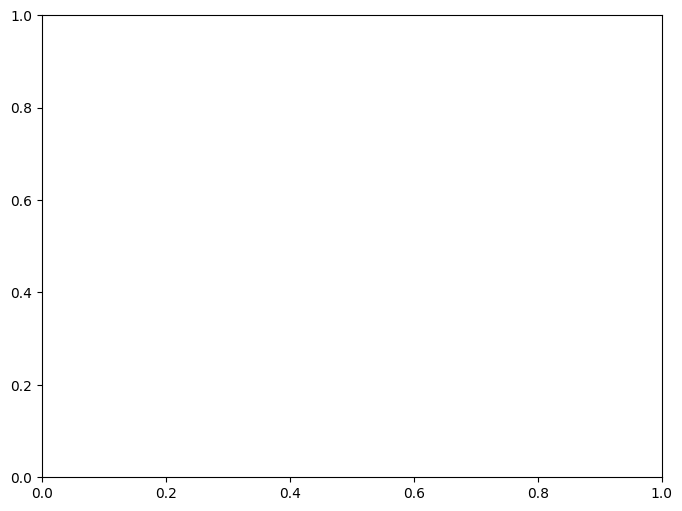

In [39]:
import matplotlib.pyplot as plt

# Define the forecasted sales and corresponding years
years = [2024]
forecasted_sales = [forecasted_sales]

# Specify the width of the bars
bar_width = 0.4

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, forecasted_sales, width=bar_width, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Forecasted Sales')
plt.title('Forecasted Sales for 2024')
plt.xticks(years)  # Set x-ticks to match the years
plt.show()


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2789 entries, 0 to 3894
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2789 non-null   int64  
 1   Sales  (₦)          2789 non-null   float64
 2   GDP Growth          2789 non-null   float64
 3   GDP_Per_Capita ($)  2789 non-null   int64  
 4   Inflation_Rate      2789 non-null   float64
 5   CPI                 2789 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 152.5 KB
